In [1]:
!pip install yfinance

In [2]:
import yfinance as yf


In [3]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [4]:
stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [6]:
google_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-22,182.350006,184.300003,181.899994,183.350006,183.350006,16303900
2024-07-23,183.839996,185.220001,183.330002,183.600006,183.600006,23772600
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900
2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25135400


In [7]:
google_data.shape

(5018, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5.018000e+03
mean,45.201131,45.678244,44.750719,45.224208,45.174166,1.157946e+08
std,43.274278,43.753787,42.853939,43.312660,43.267753,1.498096e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.032339,13.143298,12.879848,13.029474,13.014664,2.735373e+07
50%,26.980750,27.191672,26.786916,26.997500,26.966813,5.619303e+07
75%,60.199501,60.651376,59.785451,60.273501,60.204991,1.425594e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5018 entries, 2004-08-19 to 2024-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5018 non-null   float64
 1   High       5018 non-null   float64
 2   Low        5018 non-null   float64
 3   Close      5018 non-null   float64
 4   Adj Close  5018 non-null   float64
 5   Volume     5018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.4 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
!pip install matplotlib

In [12]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'closing price of google data')

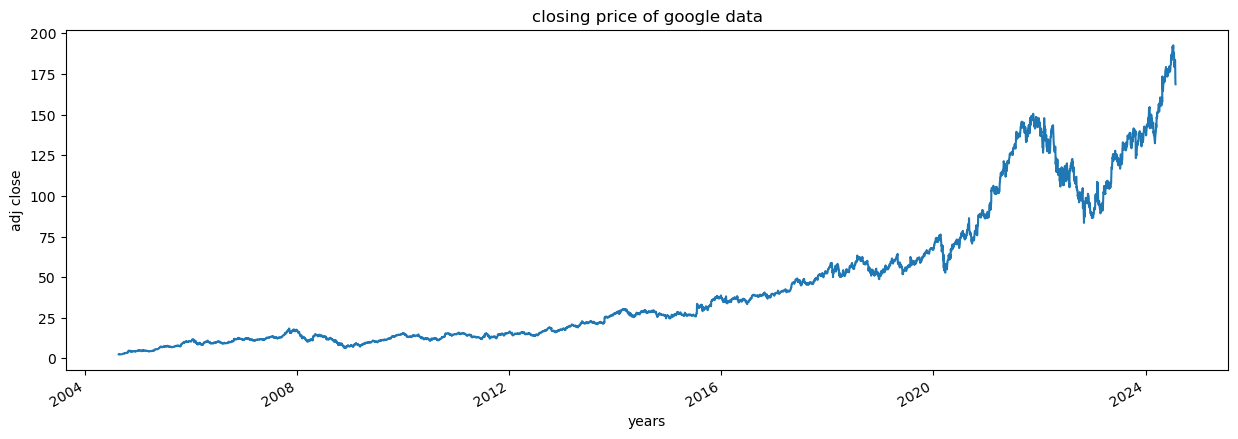

In [13]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("adj close")
plt.title("closing price of google data")

In [14]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

In [15]:
google_data.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

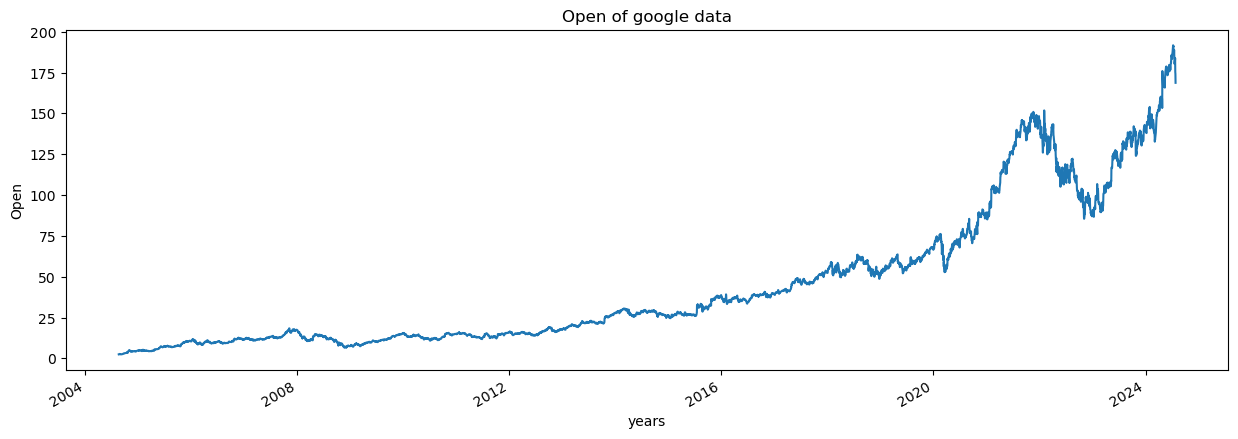

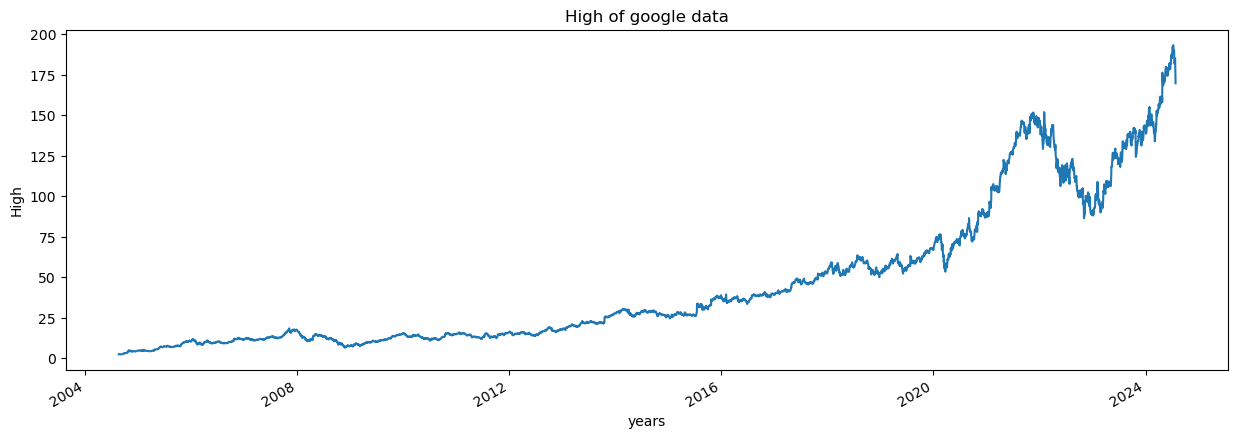

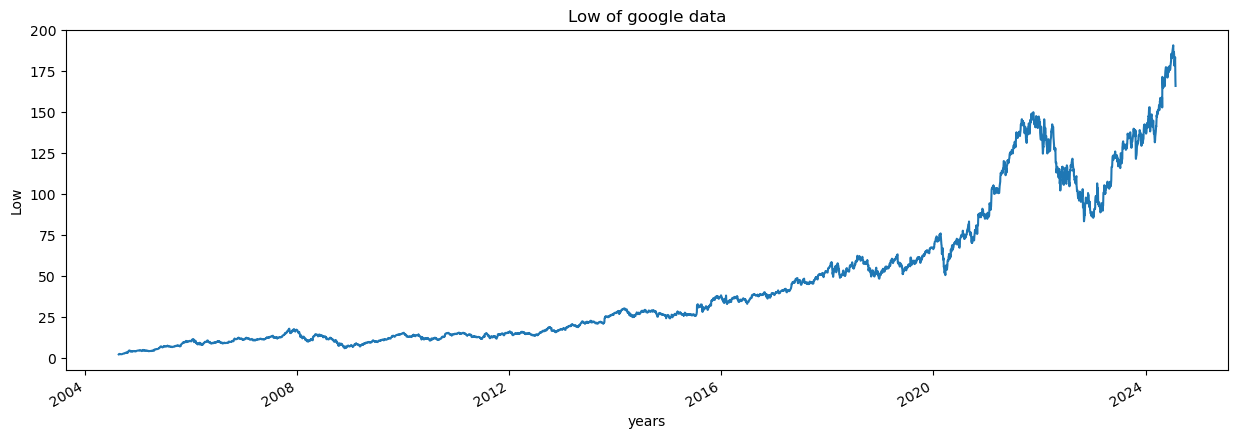

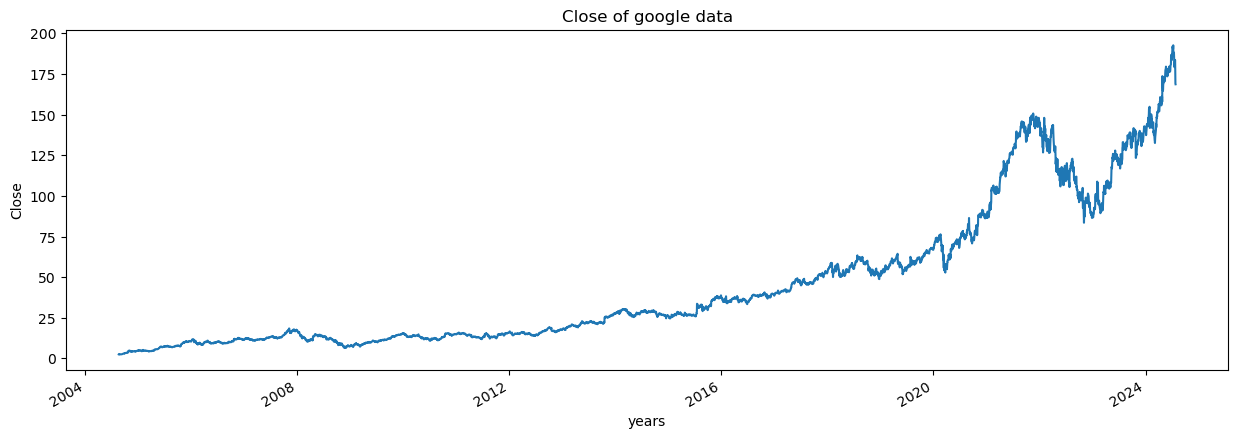

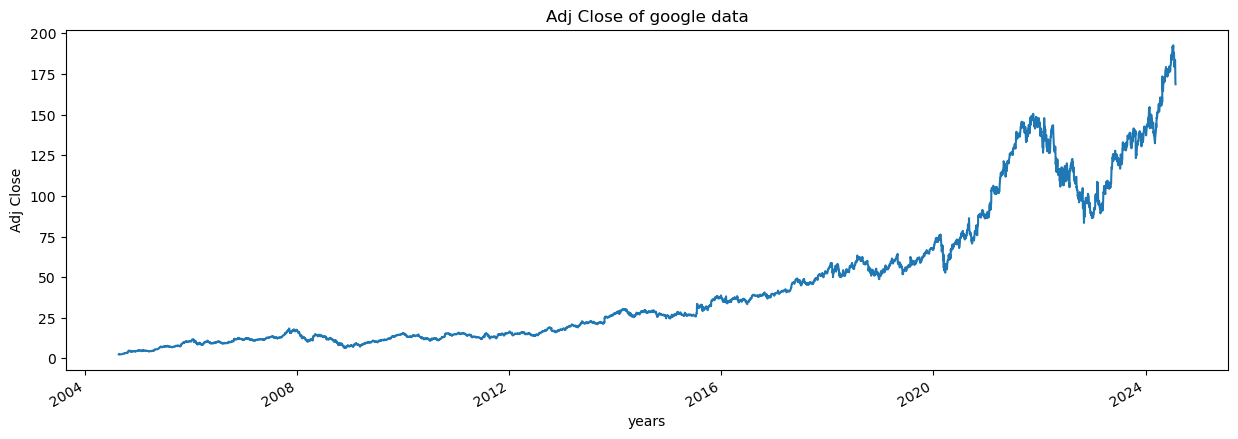

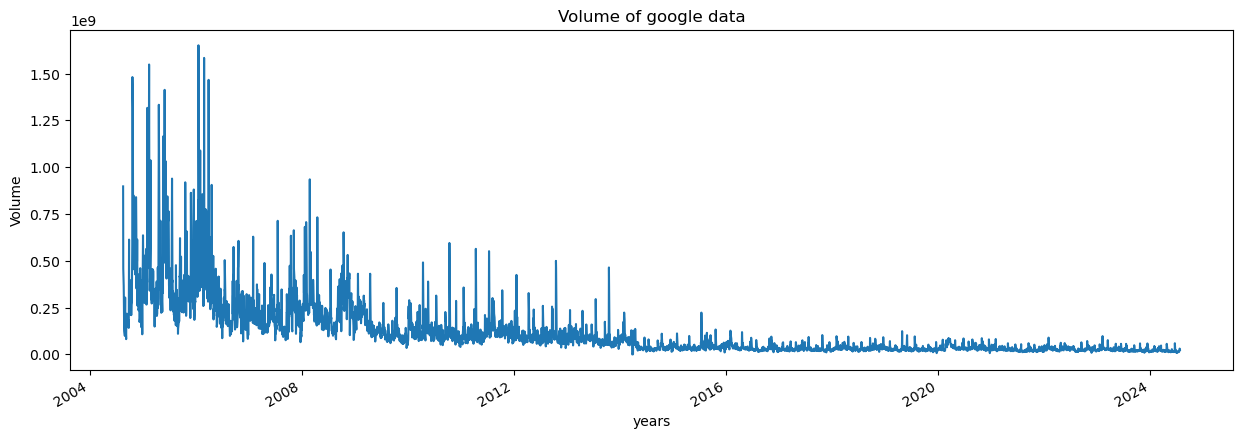

In [16]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [17]:
#moving average
temp_data=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[:5])/5)

30.0


In [18]:
import pandas as pd
data=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA']=data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 143


In [21]:
google_data['MA_for_250_days']=google_data['Adj Close'].rolling(250).mean()
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

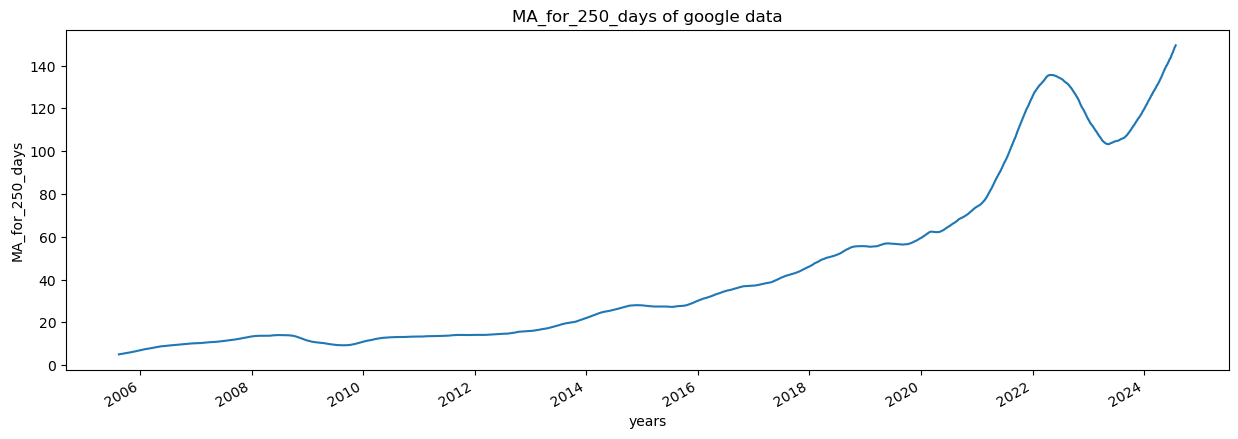

In [22]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

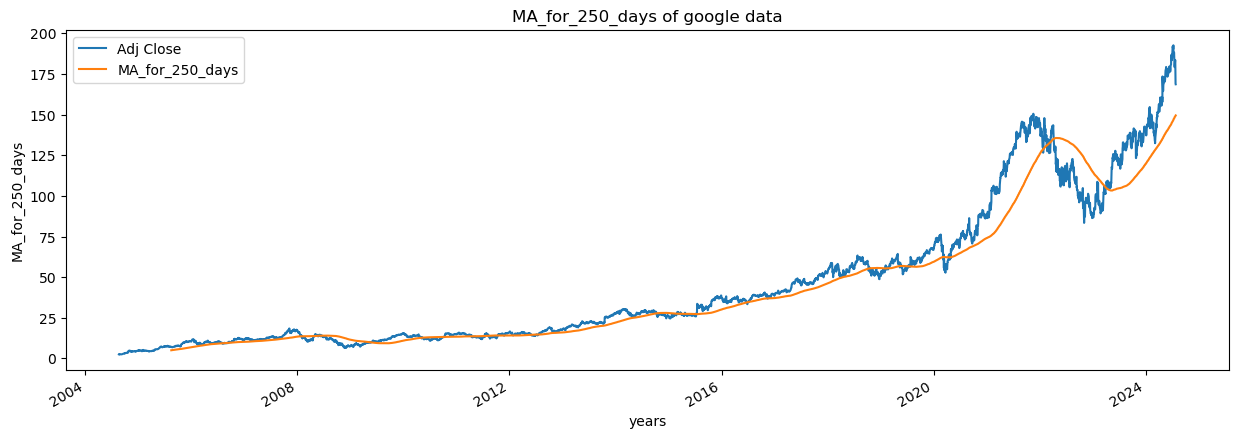

In [23]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

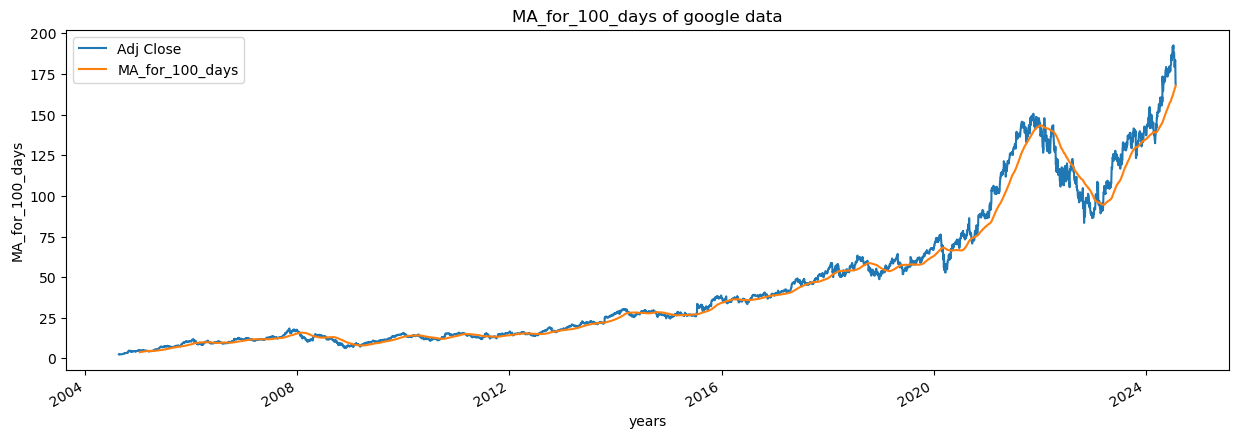

In [24]:
google_data['MA_for_100_days']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

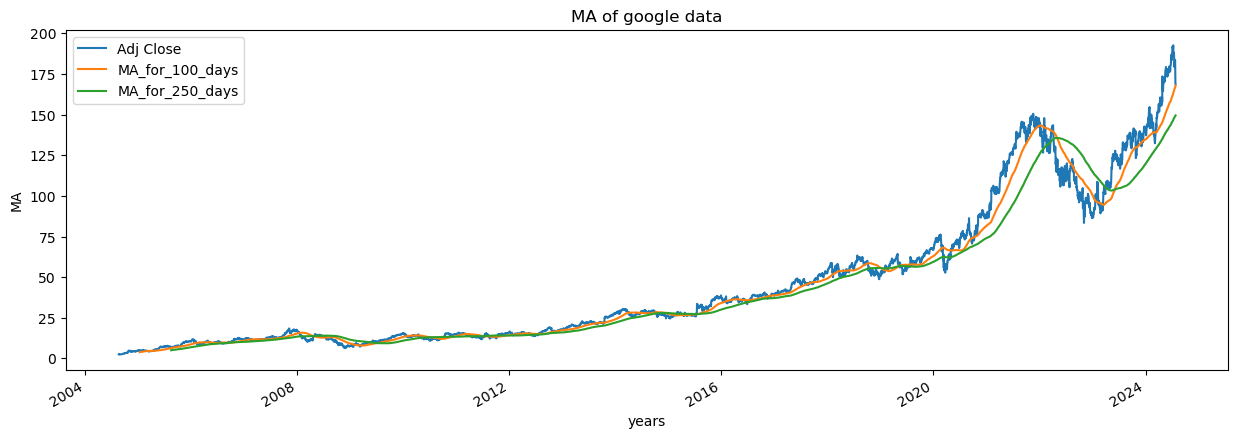

In [25]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [26]:
google_data['percentage change']=google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage change']].head()

,Adj Close,percentage change
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


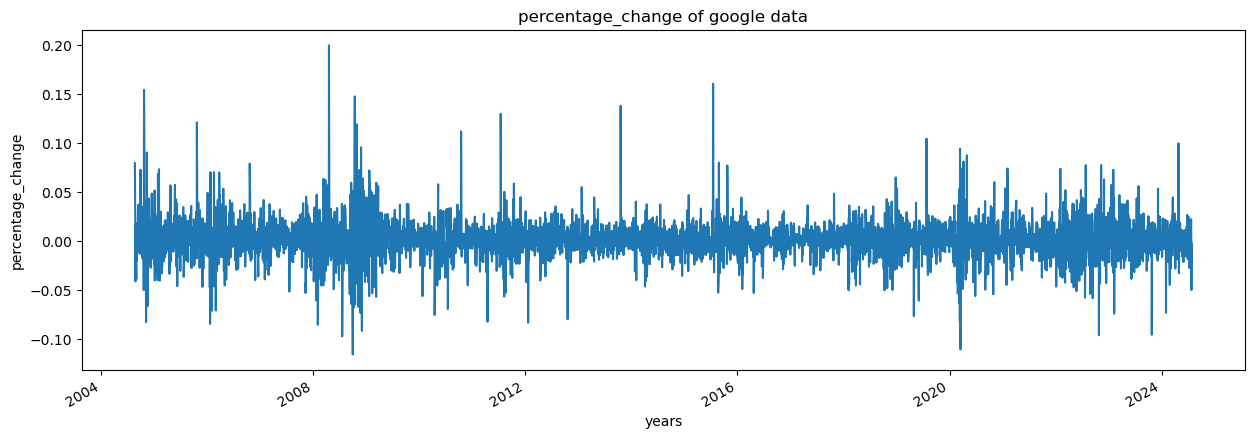

In [27]:
plot_graph((15,5),google_data['percentage change'],'percentage_change')

In [28]:
Adj_close_price=google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [30]:
!pip install scikit-learn

In [31]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [9.03823822e-01],
       [8.76427604e-01],
       [8.73903515e-01]])

In [32]:
len(scaled_data)

5018

In [33]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [35]:
int(len(x_data)*0.7)

3442

In [36]:
5004-100-int(len(x_data)*0.7)

1462

In [37]:
splitting_length=int(len(x_data)*0.7)
x_train=x_data[:splitting_length]
y_train=y_data[:splitting_length]

x_test=x_data[splitting_length:]
y_test=y_data[splitting_length:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3442, 100, 1)
(3442, 1)
(1476, 100, 1)
(1476, 1)


In [43]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [44]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [46]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3442/3442 ━━━━━━━━━━━━━━━━━━━━ 102s 28ms/step - loss: 2.6182e-04
Epoch 2/2
3442/3442 ━━━━━━━━━━━━━━━━━━━━ 105s 30ms/step - loss: 6.6771e-05


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [48]:
predictions=model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step


In [49]:
predictions

array([[0.2876545 ],
       [0.28836986],
       [0.2886149 ],
       ...,
       [0.92110026],
       [0.90368605],
       [0.87903285]], dtype=float32)

In [50]:
inv_predictions=scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.19189 ],
       [ 57.327934],
       [ 57.374535],
       ...,
       [177.65549 ],
       [174.3438  ],
       [169.65546 ]], dtype=float32)

In [51]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.6996994 ],
       [ 58.55986023],
       [ 57.73680115],
       ...,
       [174.36999512],
       [169.16000366],
       [168.67999268]])

In [52]:
rmse=np.sqrt(np.mean((inv_predictions-inv_y_test)**2))
rmse

3.4939438699386356

In [53]:
plotting_data=pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index=google_data.index[splitting_length+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2018-09-13,58.699699,57.191891
2018-09-14,58.559860,57.327934
2018-09-17,57.736801,57.374535
2018-09-18,57.995007,57.025932
2018-09-19,58.487946,56.843113


<Figure size 640x480 with 0 Axes>

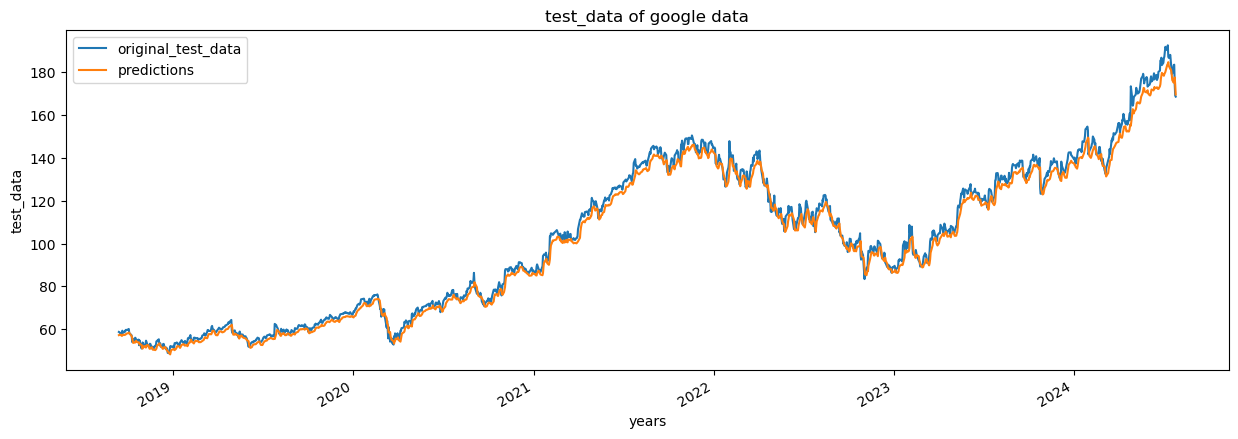

In [54]:
plot_graph((15,5),plotting_data,'test_data')

<Figure size 640x480 with 0 Axes>

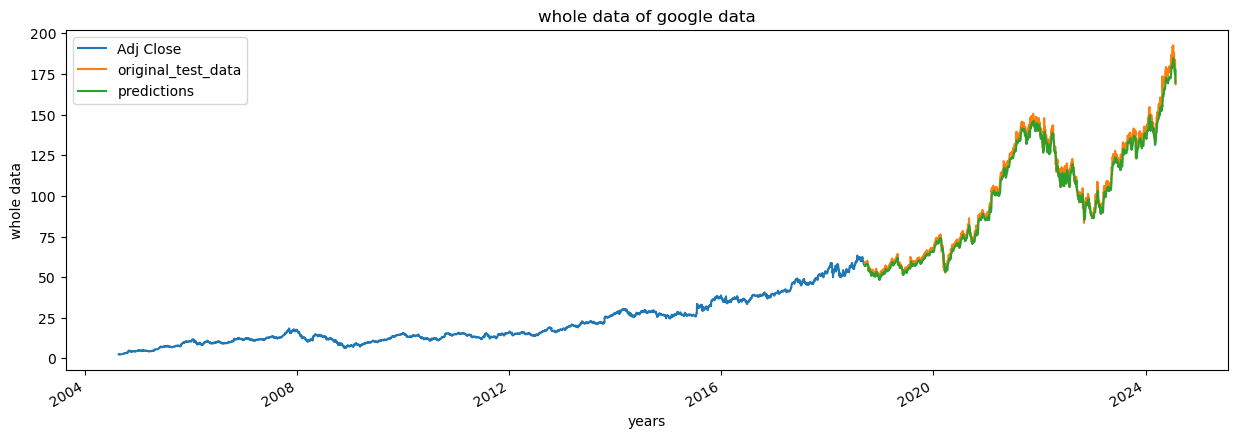

In [55]:
plot_graph((15,5),pd.concat([Adj_close_price[:splitting_length+100],plotting_data],axis=0),'whole data')

In [56]:
model.save("stock_price_predictor.keras")

In [58]:
# Future prediction
future_days = 30  # Number of days you want to predict into the future
last_100_days = scaled_data[-100:]  # Last 100 days of the dataset


In [59]:
future_predictions = []
for _ in range(future_days):
    next_pred = model.predict(np.array([last_100_days]))
    future_predictions.append(next_pred)
    last_100_days = np.append(last_100_days[1:], next_pred, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [63]:
future_predictions

[array([[0.8636725]], dtype=float32),
 array([[0.85294133]], dtype=float32),
 array([[0.84393746]], dtype=float32),
 array([[0.83590066]], dtype=float32),
 array([[0.82843566]], dtype=float32),
 array([[0.8212941]], dtype=float32),
 array([[0.8143188]], dtype=float32),
 array([[0.8074185]], dtype=float32),
 array([[0.8005508]], dtype=float32),
 array([[0.7937054]], dtype=float32),
 array([[0.7868904]], dtype=float32),
 array([[0.7801227]], dtype=float32),
 array([[0.7734211]], dtype=float32),
 array([[0.7668022]], dtype=float32),
 array([[0.76027834]], dtype=float32),
 array([[0.7538577]], dtype=float32),
 array([[0.7475434]], dtype=float32),
 array([[0.7413364]], dtype=float32),
 array([[0.73523426]], dtype=float32),
 array([[0.7292336]], dtype=float32),
 array([[0.72333]], dtype=float32),
 array([[0.717519]], dtype=float32),
 array([[0.71179605]], dtype=float32),
 array([[0.70615685]], dtype=float32),
 array([[0.70059776]], dtype=float32),
 array([[0.6951154]], dtype=float32),
 array

In [64]:
# Convert future_predictions to a 2D array before inverse_transform
future_predictions = np.array(future_predictions).reshape(-1, 1)

In [65]:
# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions)



In [67]:
# Prepare the dataframe for plotting
last_date = google_data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1)[1:]  # Exclude the start date itself
future_plot_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Future Predictions'])

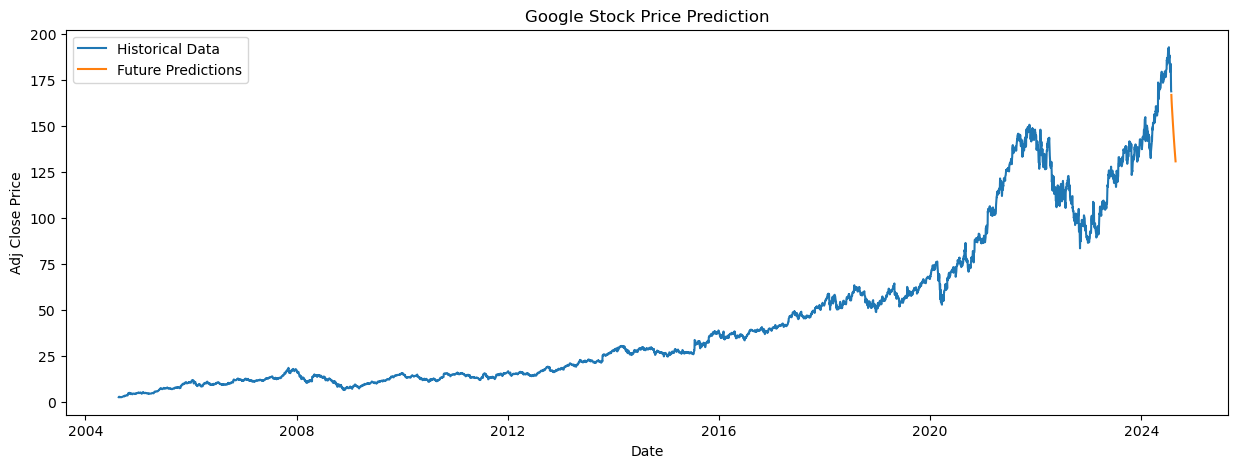

In [68]:
# Plot the future predictions
plt.figure(figsize=(15, 5))
plt.plot(Adj_close_price, label='Historical Data')
plt.plot(future_plot_data, label='Future Predictions')
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Google Stock Price Prediction")
plt.legend()
plt.show()

In [69]:
print("Future Predictions:")
print(future_plot_data)

Future Predictions:
            Future Predictions
2024-07-27          166.734344
2024-07-28          164.693573
2024-07-29          162.981293
2024-07-30          161.452927
2024-07-31          160.033279
2024-08-01          158.675171
2024-08-02          157.348648
2024-08-03          156.036423
2024-08-04          154.730377
2024-08-05          153.428558
2024-08-06          152.132538
2024-08-07          150.845520
2024-08-08          149.571060
2024-08-09          148.312332
2024-08-10          147.071671
2024-08-11          145.850647
2024-08-12          144.649841
2024-08-13          143.469452
2024-08-14          142.308990
2024-08-15          141.167847
2024-08-16          140.045151
2024-08-17          138.940048
2024-08-18          137.851700
2024-08-19          136.779282
2024-08-20          135.722107
2024-08-21          134.679520
2024-08-22          133.650970
2024-08-23          132.635895
2024-08-24          131.633911
2024-08-25          130.644547
